<a href="https://colab.research.google.com/github/AniruddhSrivatsa/AniruddhSrivatsa/blob/master/Titanic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1=df.drop(["Ticket","Cabin"],axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df1["age_group"]=pd.cut(df1["Age"],bins=[0,18,30,50,70,120],labels=[1,2,3,4,5],include_lowest=False)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3


In [ ]:
df1["Sex"]=df["Sex"].map({"male":1,"female":0}).astype("int")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,3


In [ ]:
df1.groupby(by="Embarked",as_index=False).count()

,Embarked,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,age_group
0,C,168,168,168,168,168,130,168,168,168,130
1,Q,77,77,77,77,77,28,77,77,77,28
2,S,644,644,644,644,644,554,644,644,644,554


In [ ]:
print(df1.groupby(by="Embarked",as_index=False)["Fare"].mean())
print(df1.groupby(by="Embarked",as_index=False)["Fare"].median())

  Embarked       Fare
0        C  59.954144
1        Q  13.276030
2        S  27.079812
  Embarked   Fare
0        C  29.70
1        Q   7.75
2        S  13.00


  Fare starting from Cherbourg is way more costlier than fare starting from Queenstown and Southampton

In [ ]:
#printing the percentage of passengers survived in each class
df.groupby(by="Pclass",as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The first class passengers had the highest chances of survival

In [ ]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_group
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.00,S,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.00,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.45,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.00,C,2
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,7.75,Q,3


%59.3 of the children less than or equal to 10 years survived

In [ ]:
df1.groupby("age_group")["Survived"].mean()

age_group
1    0.503597
2    0.355556
3    0.423237
4    0.355932
5    0.200000
Name: Survived, dtype: float64

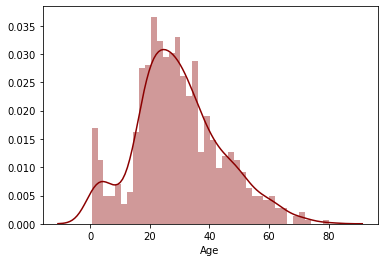

In [ ]:
sns.distplot(df1['Age'].dropna(),kde=True,color='darkred',bins=40)

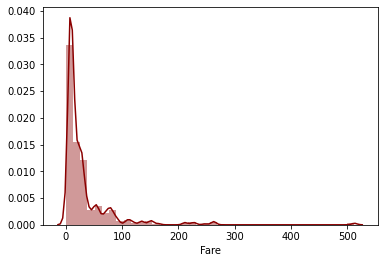

In [ ]:
sns.distplot(df1["Fare"].dropna(),kde=True,color='darkred',bins=40,)

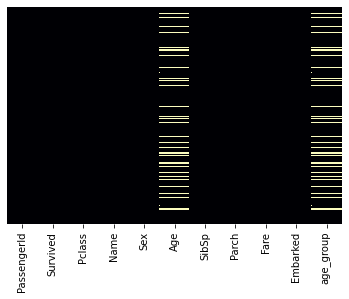

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [ ]:
def age_med(cols):
   
    Age = cols[0]
    Pclass = cols[1]
    print(type(Age))
    print(pd.isnull(Age))
    if pd.isnull(Age):

        if Pclass == 1:
            return (df1.loc[df1["Pclass"]==1]["Age"].median())

        elif Pclass == 2:
            return (df1.loc[df1["Pclass"]==2]["Age"].median())

        else:
            return (df1.loc[df1["Pclass"]==3]["Age"].median())

    else:
        return Age

In [ ]:
#we are filling the missing values of age column with the median of the age column for each class
df1['Age'] = df1[['Age','Pclass']].apply(age_med,axis=1)

<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'numpy.float64'>
False
<class 'nu

In [ ]:
df1=df1.drop(["age_group","PassengerId"],axis=1)

In [ ]:
df1=df1.drop(["Name"],axis=1)

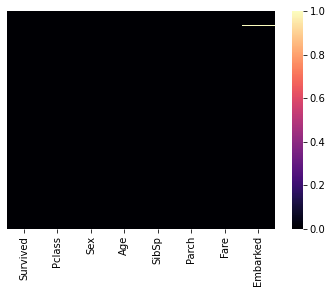

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap="magma")

In [ ]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df1.dropna(inplace=True)
print(df1.info())
print(df1.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB
None
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
df1.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


We can use the one hot encoding method or label encoder method to convert categorical variable to numeric variable

The choice is yours.... I am using label encoding method

In [ ]:
emb=pd.get_dummies(df1["Embarked"],drop_first=True)
df1=pd.concat([df1,emb],axis=1)
df1.drop(["Embarked"],axis=1,inplace=True)
df1.head()


In [ ]:
df1["Embarked"]=df1["Embarked"].map({"S":1,"C":2,"Q":3})

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [ ]:
df1[["Survived","Sex","Embarked"]]=df1[["Survived","Sex","Embarked"]].astype("int")
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [ ]:
x=df1.drop("Survived",axis=1)
y=df1["Survived"]
x_train=np.array(x)
y_train=np.array(y)
y_train=y_train.reshape(889,1)
print(x_train.shape)
print(y_train.shape)

(889, 7)
(889, 1)


In [ ]:
print(x[:3])

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         1
1       1    0  38.0      1      0  71.2833         2
2       3    0  26.0      0      0   7.9250         1


In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,stratify=y_train,random_state=0)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(666, 7) (666, 1) (223, 7) (223, 1)


In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
acc_logreg=accuracy_score(logreg.predict(X_test),Y_test)
print(acc_logreg)


0.8295964125560538


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_rf=accuracy_score(rf.predict(X_test),Y_test)
print(acc_rf)


0.8475336322869955


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
acc_dt=accuracy_score(dt.predict(X_test),Y_test)
print(acc_dt)

0.7623318385650224


In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_train,Y_train)
acc_kmeans=accuracy_score(kmeans.predict(X_test),Y_test)
print(acc_kmeans)

0.6547085201793722


In [ ]:
svc=SVC(kernel="linear")
svc.fit(X_train,Y_train)
acc_svc=accuracy_score(svc.predict(X_test),Y_test)
print(acc_svc)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7937219730941704


In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
acc_gnb=accuracy_score(gnb.predict(X_test),Y_test)
print(acc_gnb)


0.8161434977578476


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
acc_knn=accuracy_score(knn.predict(X_test),Y_test)
print(acc_knn)

0.6905829596412556


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
acc_data={"Algorithms":["LogisticRegression","KMeans","RandomForest","SVM","KNeighboursClassifier","GaussianNB","DecisionTreeClassifier"],"accuracy_scores":[acc_logreg,acc_kmeans,acc_rf,acc_svc,acc_knn,acc_gnb,acc_dt]}

In [ ]:
acc_df=pd.DataFrame(acc_data,columns=["Algorithms","accuracy_scores"])
acc_df.set_index("Algorithms")

,accuracy_scores
Algorithms,
LogisticRegression,0.829596
KMeans,0.654709
RandomForest,0.847534
SVM,0.793722
KNeighboursClassifier,0.690583
GaussianNB,0.816143
DecisionTreeClassifier,0.762332


In [ ]:
test_df.drop(["Ticket","Cabin","Name","PassengerId"],axis=1,inplace=True)
test_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
test_df1=test_df.copy()

In [ ]:
test_df1["Sex"]=test_df["Sex"].map({"male":1,"female":0}).astype("int")
test_df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [ ]:
test_df1["Embarked"]=test_df1["Embarked"].map({"S":1,"C":2,"Q":3})
test_df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


You can use this or you can use the below code

In [ ]:
emb=pd.get_dummies(test_df1["Embarked"],drop_first=True)
test_df1=pd.concat([test_df1,emb],axis=1)
test_df1.drop(["Embarked"],axis=1,inplace=True)
test_df1.head()



In [ ]:
test_df2=test_df1.copy()

In [ ]:
test_df2['Age'] = test_df2[['Age','Pclass']].apply(age_med,axis=1)
test_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [ ]:
test_df2['Fare'].fillna(test_df2['Fare'].dropna().median(), inplace=True)
test_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [ ]:
x_test=test_df2.copy()
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [ ]:
x_test=np.array(x_test)

In [ ]:
logreg.fit(x_train,y_train)
act_logreg=logreg.score(x_train,y_train)
print(act_logreg)

0.8076490438695163


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred=logreg.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
dt.fit(x_train,y_train)
act_dt=dt.score(x_train,y_train)
print(act_dt)

0.9820022497187851


In [ ]:
gnb.fit(x_train,y_train)
act_gnb=gnb.score(x_train,y_train)
print(act_gnb)

0.7919010123734533


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

rf.fit(x_train,y_train)
act_rf=rf.score(x_train,y_train)
print(act_rf)


0.9820022497187851


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
svc.fit(x_train,y_train)
act_svc=svc.score(x_train,y_train)
print(act_svc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7862767154105736


In [ ]:
knn.fit(x_train,y_train)
act_knn=knn.score(x_train,y_train)
print(act_knn)

0.8368953880764904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
acc_data={"Algorithms":["LogisticRegression","RandomForest","SVM","KNeighboursClassifier","GaussianNB","DecisionTreeClassifier"],"accuracy_scores":[act_logreg,act_rf,act_svc,act_knn,act_gnb,act_dt]}

In [ ]:
acc_df=pd.DataFrame(acc_data,columns=["Algorithms","accuracy_scores"])
acc_df.set_index("Algorithms")

,accuracy_scores
Algorithms,
LogisticRegression,0.807649
RandomForest,0.982002
SVM,0.786277
KNeighboursClassifier,0.836895
GaussianNB,0.791901
DecisionTreeClassifier,0.982002


Random forest fitted the data really well

In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


sorry to confuse u here x_train y_train has the entire rows of specified columns
X_train and Y_train are the training set obtained from train_test_split of x_train and y_train

In [ ]:
logan=pd.read_csv("titanic_test.csv")
logan=logan["PassengerId"]
logan.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [ ]:
submission = pd.DataFrame({'PassengerId':logan,'Survived':y_pred})

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [ ]:
submission.to_csv("titanic.sub",index=False)

In [ ]:
submission.to_csv(r'Desktop\titanic_sub.csv', index = False)